<a href="https://colab.research.google.com/github/michaeledge27/CSCI290/blob/main/notebooks/Bayes_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

In [19]:
penguins = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv")

In [20]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [21]:
penguins["species"].value_counts( normalize=True )

,proportion
species,
Adelie,0.441860
Gentoo,0.360465
Chinstrap,0.197674


In [22]:
penguins["body_mass_g"].mean()

4201.754385964912

In [23]:
penguins["body_mass_cat"] = (penguins["body_mass_g"] > 4200)*1

In [24]:
penguins["body_mass_cat"].value_counts(normalize=True)

,proportion
body_mass_cat,
0,0.56686
1,0.43314


In [25]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_cat
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0


<Axes: xlabel='species'>

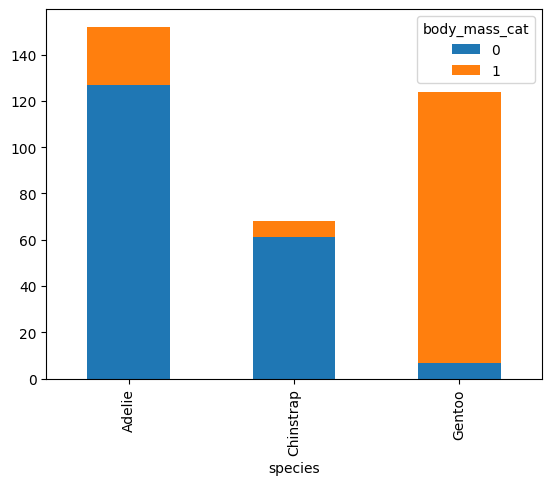

In [26]:
penguins.groupby(["species","body_mass_cat"]).size().unstack().plot(kind='bar',stacked=True)

In [27]:
penguins.groupby(["species","body_mass_cat"]).size().unstack()

body_mass_cat,0,1
species,,
Adelie,127,25
Chinstrap,61,7
Gentoo,7,117


In [28]:
penguins.groupby(["species","body_mass_cat"]).size().unstack().sum()

,0
body_mass_cat,
0,195
1,149


In [29]:
61/195

0.3128205128205128

In [30]:
penguins.groupby(["species","body_mass_cat"]).size().unstack() / penguins.groupby(["species","body_mass_cat"]).size().unstack().sum()

body_mass_cat,0,1
species,,
Adelie,0.651282,0.167785
Chinstrap,0.312821,0.046980
Gentoo,0.035897,0.785235


In [31]:
penguins.groupby(["body_mass_cat","species"]).size().unstack() / penguins.groupby(["body_mass_cat","species"]).size().unstack().sum()

species,Adelie,Chinstrap,Gentoo
body_mass_cat,,,
0,0.835526,0.897059,0.056452
1,0.164474,0.102941,0.943548


In [32]:
.44186*.835526 / .56686

0.651281653953357

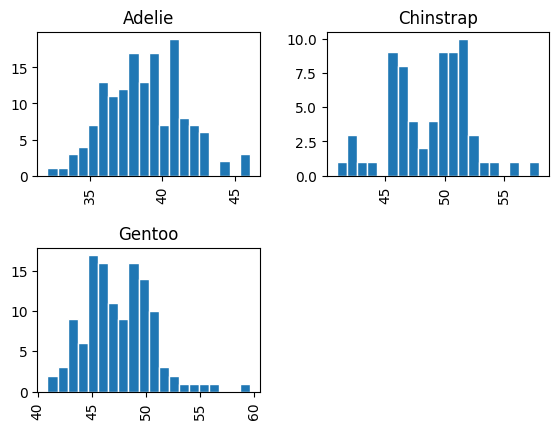

In [35]:
penguins.hist( "bill_length_mm", by="species", bins=20, edgecolor = 'white' );

In [37]:
# note: this is not really the way to calculate the posterior
penguins[ penguins["bill_length_mm"] == 50]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_cat
153,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male,2007,1
155,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,male,2007,1
181,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,male,2007,1
235,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,male,2009,1
277,Chinstrap,Dream,50.0,19.5,196.0,3900.0,male,2007,0


In [38]:
penguins.groupby("species")["bill_length_mm"].mean()

,bill_length_mm
species,
Adelie,38.791391
Chinstrap,48.833824
Gentoo,47.504878


In [39]:
penguins.groupby("species")["bill_length_mm"].std()

,bill_length_mm
species,
Adelie,2.663405
Chinstrap,3.339256
Gentoo,3.081857


In [40]:
from scipy.stats import norm

In [50]:
billLikelihoods = norm.pdf( x=50, loc=penguins.groupby("species")["bill_length_mm"].mean(), scale=penguins.groupby("species")["bill_length_mm"].std() )
billLikelihoods

array([2.13649571e-05, 1.12402604e-01, 9.32743373e-02])

In [51]:
priors

,proportion
species,
Adelie,0.441860
Gentoo,0.360465
Chinstrap,0.197674


In [56]:
priors * billLikelihoods

,proportion
species,
Adelie,0.000009
Gentoo,0.040517
Chinstrap,0.018438


In [57]:
import seaborn as sns

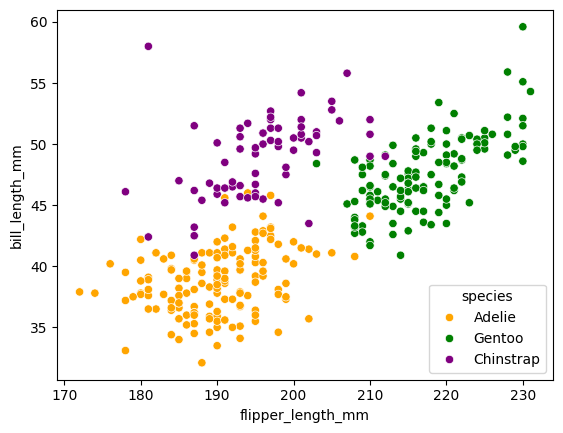

In [58]:
sns.scatterplot(x="flipper_length_mm", y="bill_length_mm", data=penguins, hue="species", palette = ["orange", "green", "purple"]);

In [60]:
flipperLikelihoods = norm.pdf( x=190, loc=penguins.groupby("species")["flipper_length_mm"].mean(), scale=penguins.groupby("species")["flipper_length_mm"].std())
flipperLikelihoods

array([6.10038771e-02, 4.00795039e-02, 9.38747500e-06])

In [61]:
# Naive Bayes assumes feature independence, so we can just multiply likelihoods
(priors * billLikelihoods * flipperLikelihoods)

,proportion
species,
Adelie,5.758967e-07
Gentoo,1.623910e-03
Chinstrap,1.730858e-07
